In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
path = 'data/number-of-deaths-by-risk-factor.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [5]:
#rename columns
all_columns = df.columns.tolist()
rename_columns = all_columns[3:]

rename_columns = [col.split(' - ')[2] for col in rename_columns]
rename_columns = [col.split(': ')[1] for col in rename_columns]
final_columns = all_columns[:3] + rename_columns
df.columns = final_columns

In [6]:
df.head()

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alcohol use,Diet low in fruits,Unsafe water source,...,High body-mass index,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


In [7]:
#convert to thousands for better visualization
df.iloc[:,3:] = df.iloc[:,3:].div(1000)

In [8]:
#plot year to year percentage of deaths by risk factor in Bangladesh
df_bangladesh = df[df['Entity'] == 'Bangladesh']
df_bangladesh = df_bangladesh.drop(['Entity', 'Code'], axis=1)
df_bangladesh = df_bangladesh.set_index('Year')


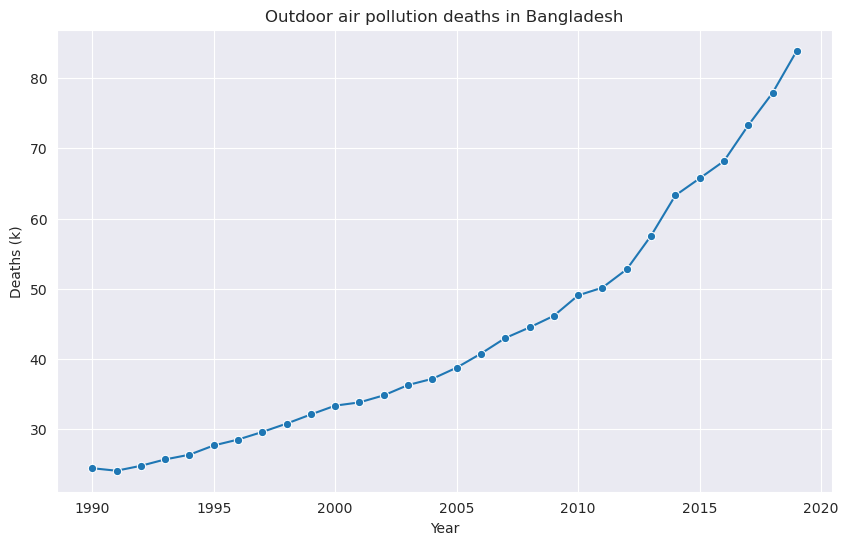

In [9]:
#plot for Ourdoor air pollution
#use k for thousands in y axis
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.lineplot(data=df_bangladesh['Outdoor air pollution'], marker='o')
plt.title('Outdoor air pollution deaths in Bangladesh')
plt.ylabel('Deaths (k)')
plt.xlabel('Year')
plt.show()